In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
#minimizing the function
from scipy.optimize import minimize

In [4]:
def f(x):
    return (x-3)**2

In [6]:
res = minimize(f,2)
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [7]:
res.x

array([2.99999999])

In [8]:
# 2 dimesional function
f = lambda x: (x[0] - 1)**2 +(x[1]-2.5)**2  ## for the fucntion (x-1)**2 - (y - 2.5)**2

In [9]:
f([1,2])

0.25

In [10]:
cons = ({'type': 'ineq', 'fun': lambda x: x[0]-2*x[1] +2},
        {'type': 'ineq', 'fun': lambda x: -x[0]-2*x[1] +6},
        {'type': 'ineq', 'fun': lambda x: x[0]-2*x[1] +2}
       )
bnds = ((0,None), (0, None))

In [12]:
res = minimize(f, (2,0), bounds = bnds, constraints= cons)
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

In [13]:
#minimize?


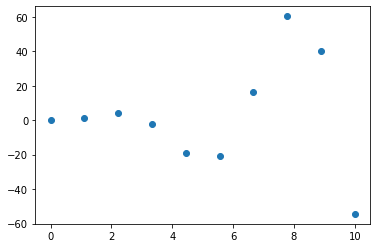

In [14]:
#interpolation
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [18]:
from scipy.interpolate import interp1d

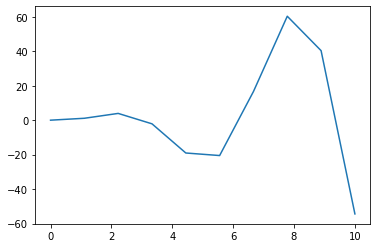

In [20]:
f = interp1d(x,y, kind = 'linear')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

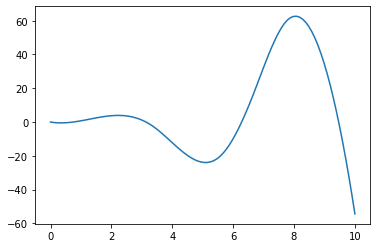

In [22]:
f = interp1d(x,y, kind = 'cubic')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

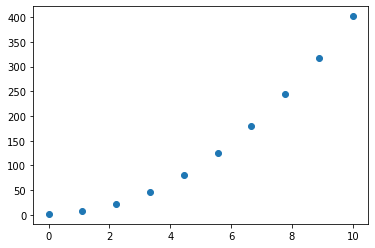

In [31]:
#curve fitting
x_data = np.linspace(0, 10, 10) # this data is made here , we can collect our own data also 
y_data = 4*x_data**2 + 2
plt.scatter(x_data, y_data)

In [32]:
from scipy.optimize import curve_fit
def func(x,a,b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x_data, y_data, p0 = (1,1))

In [33]:
popt

array([4., 2.])

In [34]:


t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])



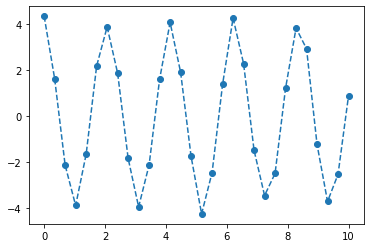

In [35]:
plt.plot(t_data, y_data, "o--")

In [36]:
def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt

array([3.94836218, 2.99899521, 0.10411349])

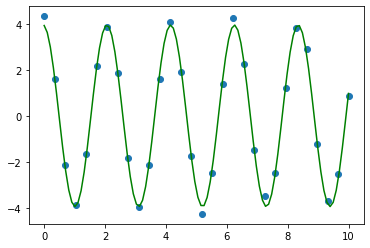

In [38]:
A, w, phi = popt
t = np.linspace(0,10,100)
y = func(t, A, w, phi)
plt.scatter(t_data, y_data)
plt.plot(t, y, color = 'g')

In [42]:
# error on omega 
a = np.diag(pcov)  # variance of the A, w , phi
b = np.sqrt(np.diag(pcov))  # sd or error on the 3 parameters
print(a,b)

[2.61882716e-03 1.85638043e-05 6.63424701e-04] [0.05117448 0.00430857 0.02575703]


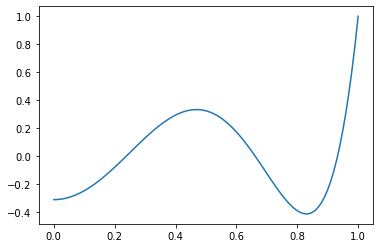

In [43]:
### special polynomials

## legendre and bessel functions


from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()



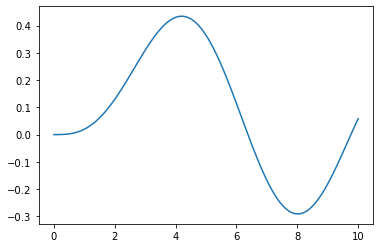

In [45]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show() 

In [46]:
## calculus
from scipy.misc import derivative 

In [47]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0,1,100)

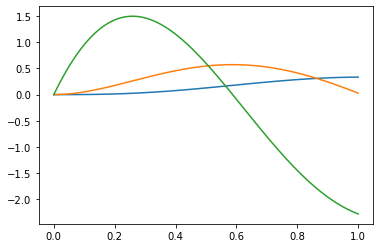

In [50]:
plt.plot(x, f(x))
plt.plot(x,derivative(f,x, dx = 1e-6))
plt.plot(x, derivative(f,x,dx = 1e-6, n=2))

In [52]:
###integration
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral, integral_error = quad(integrand, 0,1)
integral

0.10246777930717413

In [75]:
from scipy.integrate import dblquad
integrand = lambda y,x : np.sin(x + y**2)
lwr_y = lambda x : -x
upr_y = lambda x : x**2
integral, integral_error = dblquad(integrand, 0,1, lwr_y, upr_y)

In [76]:
print(integral, integral_error)

0.5900903244088529 2.0545915475811425e-14


In [57]:
# differential equations
from scipy.integrate import odeint

In [61]:
def dvdt(v,t):
    return 3*v**2 - 5
v0 = 0
time = np.linspace(0,1,100)
sol = odeint(dvdt, v0, time)
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

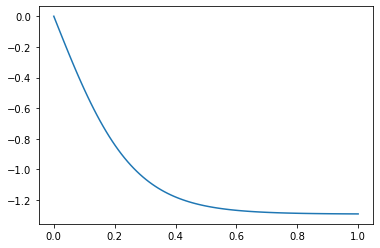

In [62]:
plt.plot(time, sol.T[0])

In [65]:
## coupled differential equation
# S is a vector we have S = (y1, y2), S is a place holder variable 

def dsdx(S, x):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,        # return as a vector as a derivative (dy1 dx)
           3*y1 + y2**3 - np.cos(x)]   # return as a vector as a derivative (dy2 dx)
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [69]:
x = np.linspace(0,1, 100)
sol = odeint(dsdx, S_0, x)
y1 = sol.T[0]
y2 = sol.T[1]

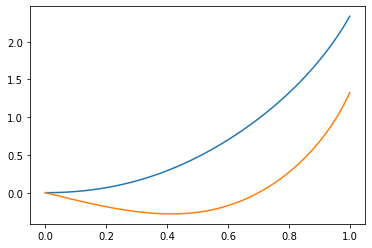

In [71]:
plt.plot(x, y1)
plt.plot(x, y2)

In [72]:
# seconf order diffrential equation
# scipy can only solve first order differenctial equations do we split the second order differential equaltion 
# in to first order equations

# S = (theta,omega)

def dSdt(S, t):
    theta, omega = S
    return [omega,
           np.sin(theta)]
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)


In [73]:
t = np.linspace(0,20,100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

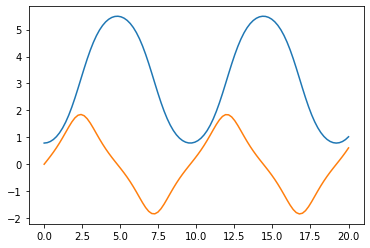

In [74]:
plt.plot(t, theta)
plt.plot(t, omega)

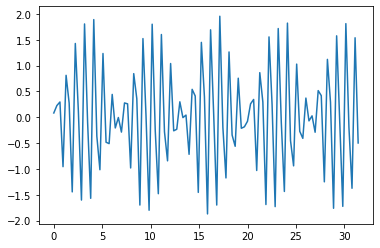

In [81]:
### fourier transform
time = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*time) + np.sin(4*np.pi*time) + 0.1*np.random.randn(len(time))
plt.plot(time, x)

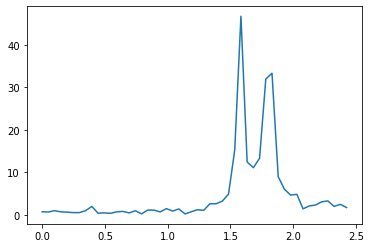

In [91]:


from scipy.fft import fft, fftfreq
N = len(x)
yf = fft(x)[:N//2]  # this is the fourirer transform
xf = fftfreq(N, np.diff(t)[0])[:N//2]  # these are the frequencies 

#plt.plot(np.abs(yf))

# np.diff()
plt.plot(xf, np.abs(yf))  # xf is the frequency and yf is the is the fourier trasnforms 

In [92]:
## complicated examples 



def f(A): 
    integrand = lambda t: 2 / (1 + np.abs(A*np.sin(np.pi*t/10)))**2 + 5*np.sqrt(1+(np.pi*A/10)**2 * np.cos(np.pi * t / 10)**2)
    return quad(integrand, 0, 10)[0]

minimize(f, 0.001, method="CG").x



array([1.42591231])

In [98]:
time = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature [K]')

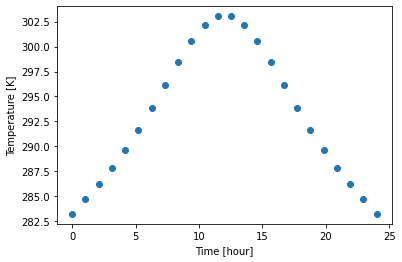

In [99]:
plt.scatter(time, temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [100]:
Ts = interp1d(time, temp_m, kind='cubic') # Ts as a function of time
Ts(1.345)

array(285.12858559)

In [113]:


def dTdt(T, t):
    return -0.5*(T-Ts(t))

times = np.linspace(1, 23, 1000)
T0 = 284.6945461

sol = odeint(dTdt, T0, times)

sol = sol.T[0]

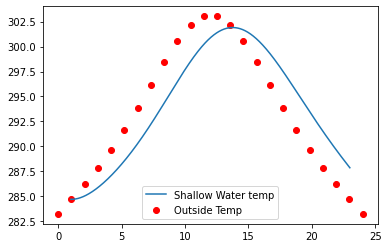

In [114]:


plt.plot(times, sol, label='Shallow Water temp')
plt.scatter(t_m, temp_m, color='r', label='Outside Temp')
plt.legend()



In [115]:
from scipy.linalg import solve_triangular  # AX = B equation solving a lower traingular matrix, gives solution for X 
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

In [118]:
# toplitz matrixes 
from scipy.linalg import solve_toeplitz, toeplitz # AX = B, we can solve for X
# a Toplitz matrix is somethig where all the diagonals are the same
# for example
toplitz = np.array([[1,-1,2,3],
                   [3,1,-1,2],
                   [6,3,1,-1], 
                   [10,6,3,1]])

c_1 = np.array([1, 3, 6, 10])    # First column of T
r_1 = np.array([1, -1, -2, -3])  # First row of T
b = np.array([1, 2, 2, 5])

x = solve_toeplitz((c_1, r_1), b)
x


array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

In [131]:
# eigen value problems
# tradiagonal matrices  meaning diagonal has 3 in all values , toplitz = contsant diagonals
# Ax = lambda x, where lambda is the eigen values, x is the eigen vector and A is any matrix 

from scipy.linalg import eigh_tridiagonal
d = 3*np.ones(4)
e = -1*np.ones(3)
w, v = eigh_tridiagonal(d, e) #here v is the eigen vectors matrix and w is the eigen value matrix 


In [132]:
# if we transpose the v matrix then we get one dimensional array
v.T[0] # first eigen vector

array([0.37174803, 0.60150096, 0.60150096, 0.37174803])

In [133]:
A = np.diag(d) + np.diag(e, k = 1) + np.diag(e, k = -1)

In [134]:
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [135]:
A@v.T[1] # this is the matrix multiplication # AX

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [137]:
# and  , here lambda X
w[1] * v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [138]:
# special matrices

from scipy.linalg import fiedler
fiedler([1, 4, 12, 45])



array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

In [140]:
# decomposition of the metrices
from scipy.linalg import lu
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = lu(A)

In [141]:
p   # permutation matrix

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [142]:
l  # lower traingular matrix

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.28571429,  1.        ,  0.        ,  0.        ],
       [ 0.71428571,  0.12      ,  1.        ,  0.        ],
       [ 0.71428571, -0.44      , -0.46153846,  1.        ]])

In [143]:
u # upper traiangular matrix

array([[ 7.        ,  5.        ,  6.        ,  6.        ],
       [ 0.        ,  3.57142857,  6.28571429,  5.28571429],
       [ 0.        ,  0.        , -1.04      ,  3.08      ],
       [ 0.        ,  0.        ,  0.        ,  7.46153846]])

In [144]:
from scipy.linalg import cholesky  # cholesky matrix
A = np.array([[1,0.2],[0.2,1]])
C = cholesky(A, lower=True)  # he wants the lower trangular version

In [145]:
C


array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

In [147]:
### important is the sparse matrices
from scipy.linalg import kron # kronecker product, NOT sum
N= 5
d = -2*np.ones(N)
e = np.ones(N-1)
D = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
D_kronsum = kron(D, np.identity(N)) + kron(np.identity(N),D)
d

array([-2., -2., -2., -2., -2.])

In [150]:
D

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

In [151]:
D_kronsum

array([[-4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

In [185]:
from scipy import sparse
N = 100
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
sparse.kronsum(D,D)



<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

In [180]:
a = np.diag(2 * np.ones(10))  # just a way of making diagonal matrices
b = np.diag(3* np.ones(10-1), k = 1)
c = np.diag(3 * np.ones(10-1), k = -1)
a + b + c

array([[2., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 2., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 2., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 2., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 2., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 2., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 2., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 2., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 2., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 2.]])

In [186]:
print(D)

  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 3)	1.0
  (5, 4)	1.0
  (6, 5)	1.0
  (7, 6)	1.0
  (8, 7)	1.0
  (9, 8)	1.0
  (10, 9)	1.0
  (11, 10)	1.0
  (12, 11)	1.0
  (13, 12)	1.0
  (14, 13)	1.0
  (15, 14)	1.0
  (16, 15)	1.0
  (17, 16)	1.0
  (18, 17)	1.0
  (19, 18)	1.0
  (20, 19)	1.0
  (21, 20)	1.0
  (22, 21)	1.0
  (23, 22)	1.0
  (24, 23)	1.0
  (25, 24)	1.0
  :	:
  (74, 75)	1.0
  (75, 76)	1.0
  (76, 77)	1.0
  (77, 78)	1.0
  (78, 79)	1.0
  (79, 80)	1.0
  (80, 81)	1.0
  (81, 82)	1.0
  (82, 83)	1.0
  (83, 84)	1.0
  (84, 85)	1.0
  (85, 86)	1.0
  (86, 87)	1.0
  (87, 88)	1.0
  (88, 89)	1.0
  (89, 90)	1.0
  (90, 91)	1.0
  (91, 92)	1.0
  (92, 93)	1.0
  (93, 94)	1.0
  (94, 95)	1.0
  (95, 96)	1.0
  (96, 97)	1.0
  (97, 98)	1.0
  (98, 99)	1.0


In [187]:
from scipy.stats import beta

In [189]:
a,b = 2.5,3.1
mean, var, skew, kurt = beta.stats(a,b, moments = 'mvsk')

In [190]:
mean

array(0.44642857)

In [191]:
var

array(0.03744395)

In [192]:
skew

array(0.1457098)

In [193]:
kurt

array(-0.66953054)

In [211]:
beta.ppf(0.999,a,b)


0.9406510288458398

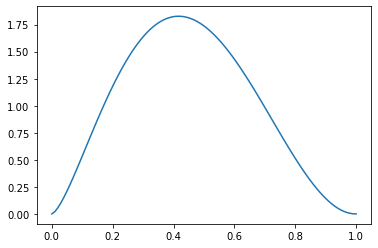

In [209]:
x = np.linspace(beta.ppf(0,a,b),beta.ppf(1,a,b),100)  # here beta.ppf gives the area which is to be used in 
                                                      # cumulative distribution ppf is the inverse of cumulative distribution
plt.plot(x, beta.pdf(x,a,b))  # plotting the beta distribution

In [212]:
from scipy.stats import norm

In [213]:
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')

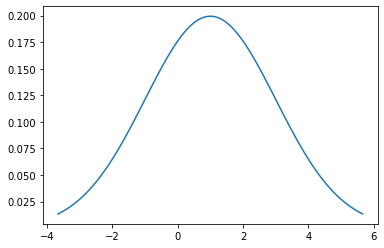

In [214]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))

In [217]:
var

array(4.)

In [225]:
y = np.arange(-4,6,0.1)

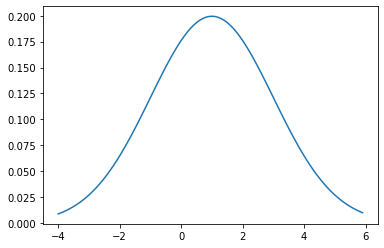

In [226]:
plt.plot(y,norm.pdf(y, mu, sigma))

In [236]:
##some examples of the ppf
std = 4.1532
mean = 172.7815
ppf = norm.ppf(0.975, loc=172.7815, scale=4.1532)
interval_value = std * ppf
lower_95 = mean - interval_value
upper_95 = mean + interval_value

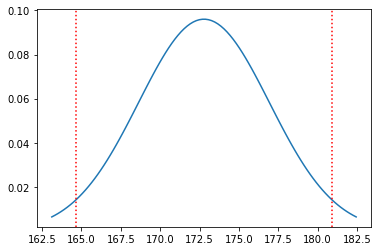

In [244]:
upper_of_interval = norm.ppf(0.975, loc=172.7815, scale=4.1532)
lower_of_interval = norm.ppf(0.025, loc=172.7815, scale=4.1532)


x = np.linspace(norm.ppf(0.01, mean, std), norm.ppf(0.99, mean, std), 100)
plt.plot(x, norm.pdf(x, mean, std))
_ = plt.axvline(upper_of_interval, color='r', linestyle=':')
_ = plt.axvline(lower_of_interval, color='r', linestyle=':')